In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict
import pprint

In [17]:
def is_even(num):
    if num % 2 == 0:
        return True
    else:
        return False

def is_odd(num):
    return not is_even(num)

def around_center(center_value, num_items, spacing):
    # Generate values with correct spacing
    vals = [0]
    for i in range(num_items-1):
        vals.append(vals[i]+spacing)
    vals = np.array(vals, dtype=float)

    # Add offset so values are centered
    if is_even(num_items):
        # put half on one side and half on the other
        vals += float(center_value)
    else:
        vals += float(center_value)-float(spacing*(num_items - int(num_items/2+1)))
    return vals

def generate_positions(center, num_rovers, num_uavs, x_spacing):
    # Get x positions
    rover_xs = around_center(center_value=center[0], num_items=num_rovers, spacing=x_spacing)
    uav_xs = around_center(center_value=center[0], num_items=num_uavs, spacing=x_spacing)

    # Offset uavs by 2 to the left
    uav_xs -= 2

    # Set y positions
    rover_y = center[1]
    uav_y = center[1] - 2

    # Zip xs and ys together (for rovers, then for uavs)
    rover_positions = []
    for rover_x in rover_xs:
        rover_positions.append([rover_x, rover_y])

    uav_positions = []
    for uav_x in uav_xs:
        uav_positions.append([uav_x, uav_y])
    
    return np.array(rover_positions, dtype=float), np.array(uav_positions, dtype=float)

rover_positions, uav_positions = generate_positions((100, 100), 5, 5, 10)
print(rover_positions)
print(uav_positions)

[[ 80. 100.]
 [ 90. 100.]
 [100. 100.]
 [110. 100.]
 [120. 100.]]
[[ 78.  98.]
 [ 88.  98.]
 [ 98.  98.]
 [108.  98.]
 [118.  98.]]


In [3]:
"""Code for generating poi positions"""

x_bound = 200.
y_bound = 200.
num_pois = 15

center_xs = np.random.uniform(low=0.0, high=x_bound, size=num_pois)
center_ys = np.random.uniform(low=0.0, high=y_bound, size=num_pois)

poi_centers = np.array([[x, y] for x,y in zip(center_xs, center_ys)])

print(poi_centers)

[[156.99407922 180.16794427]
 [134.60208874 170.32557523]
 [188.71174581  19.18174678]
 [186.33729157  12.47066354]
 [158.20384268  46.42105492]
 [176.62159263  89.99658746]
 [ 74.72324441 141.83747654]
 [155.99134147  60.75432924]
 [187.22982618 198.89765742]
 [120.69873449 115.75248108]
 [162.51288971  69.76871258]
 [128.68305528  15.03272909]
 [ 39.96860761  42.97351586]
 [158.05484571  84.11300406]
 [ 59.92626861   8.03147351]]


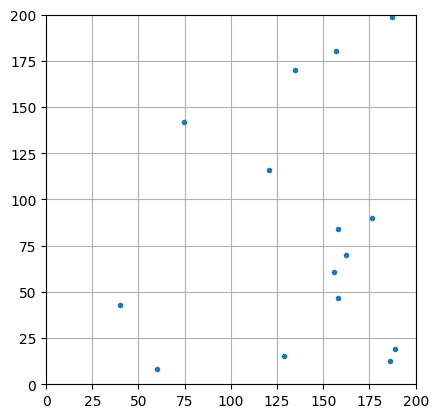

In [4]:
plt.plot(poi_centers[:,0], poi_centers[:,1], ls='', marker='.')
plt.axis('scaled')
plt.xlim((0, x_bound))
plt.ylim((0, y_bound))
plt.grid()

In [10]:
def generate_poi_configs(poi_positions: np.array, side_len: float) -> List[Dict]:
    poi_configs = []
    for poi_position in poi_positions:
        if side_len == 0:
            position_config = {
                'spawn_rule': 'fixed',
                'fixed': poi_position
            }
        else:
            position_config = {
                'spawn_rule': 'random_uniform',
                'random_uniform': {
                    'high_x': float(poi_position[0]+side_len/2),
                    'low_x': float(poi_position[0]-side_len/2),
                    'high_y': float(poi_position[1]+side_len/2),
                    'low_y': float(poi_position[1]+side_len/2)
                }
            }
        poi_configs.append({
            'coupling': 1,
            'observation_radius': 1000.0,
            'position': position_config
        })
    return poi_configs

poi_configs = generate_poi_configs(poi_positions=poi_centers, side_len=0.0)
pprint.pprint(poi_configs)

[{'coupling': 1,
  'observation_radius': 1000.0,
  'position': {'fixed': array([156.99407922, 180.16794427]),
               'spawn_rule': 'fixed'}},
 {'coupling': 1,
  'observation_radius': 1000.0,
  'position': {'fixed': array([134.60208874, 170.32557523]),
               'spawn_rule': 'fixed'}},
 {'coupling': 1,
  'observation_radius': 1000.0,
  'position': {'fixed': array([188.71174581,  19.18174678]),
               'spawn_rule': 'fixed'}},
 {'coupling': 1,
  'observation_radius': 1000.0,
  'position': {'fixed': array([186.33729157,  12.47066354]),
               'spawn_rule': 'fixed'}},
 {'coupling': 1,
  'observation_radius': 1000.0,
  'position': {'fixed': array([158.20384268,  46.42105492]),
               'spawn_rule': 'fixed'}},
 {'coupling': 1,
  'observation_radius': 1000.0,
  'position': {'fixed': array([176.62159263,  89.99658746]),
               'spawn_rule': 'fixed'}},
 {'coupling': 1,
  'observation_radius': 1000.0,
  'position': {'fixed': array([ 74.72324441, 141.83

In [16]:
def pois_as_yaml(poi_configs):
    yaml_str= '  pois:\n'
    yaml_str+= 2*'  '+'hidden_pois:\n'
    for poi_config in poi_configs:
        yaml_str+=2*'  '+'- coupling: '+str(poi_config['coupling'])+'\n'
        yaml_str+=3*'  '+'observation_radius: '+str(poi_config['observation_radius'])+'\n'
        yaml_str+=3*'  '+'position:\n'
        yaml_str+=4*'  '+'spawn_rule: '+poi_config['position']['spawn_rule']+'\n'
        if poi_config['position']['spawn_rule'] == 'random_uniform':
            yaml_str+=4*'  '+'random_uniform:\n'
            yaml_str+=5*'  '+'high_x: '+str(poi_config['position']['random_uniform']['high_x'])+'\n'
            yaml_str+=5*'  '+'high_y: '+str(poi_config['position']['random_uniform']['high_y'])+'\n'
            yaml_str+=5*'  '+'low_x: '+str(poi_config['position']['random_uniform']['low_x'])+'\n'
            yaml_str+=5*'  '+'low_y: '+str(poi_config['position']['random_uniform']['low_y'])+'\n'
        elif poi_config['position']['spawn_rule'] == 'fixed':
            yaml_str+=4*'  '+'fixed: ['+str(poi_config['position']['fixed'][0])+','+str(poi_config['position']['fixed'][1])+']\n'
        
        yaml_str+=3*'  '+'value: 1.0\n'
        yaml_str+=3*'  '+'constraint: sequential\n'
    return yaml_str

pois_yaml = pois_as_yaml(poi_configs)
print(pois_yaml)

  pois:
    hidden_pois:
    - coupling: 1
      observation_radius: 1000.0
      position:
        spawn_rule: fixed
        fixed: [156.99407921780082,180.1679442666875]
      value: 1.0
      constraint: sequential
    - coupling: 1
      observation_radius: 1000.0
      position:
        spawn_rule: fixed
        fixed: [134.6020887414939,170.32557522619442]
      value: 1.0
      constraint: sequential
    - coupling: 1
      observation_radius: 1000.0
      position:
        spawn_rule: fixed
        fixed: [188.71174580753492,19.181746782019047]
      value: 1.0
      constraint: sequential
    - coupling: 1
      observation_radius: 1000.0
      position:
        spawn_rule: fixed
        fixed: [186.33729156716018,12.470663538151715]
      value: 1.0
      constraint: sequential
    - coupling: 1
      observation_radius: 1000.0
      position:
        spawn_rule: fixed
        fixed: [158.2038426786788,46.421054917084525]
      value: 1.0
      constraint: sequential
    - co

In [19]:
def agent_positions_as_yaml(positions: np.array, observation_radius: float):
    yaml_str = ''
    for position in positions:
        yaml_str+=2*'  '+'- observation_radius: '+str(observation_radius)+'\n'
        yaml_str+=3*'  '+'position:\n'
        yaml_str+=4*'  '+'fixed:\n'
        yaml_str+=4*'  '+'- '+str(position[0])+'\n'
        yaml_str+=4*'  '+'- '+str(position[1])+'\n'
        yaml_str+=4*'  '+'spawn_rule: fixed\n'
        yaml_str+=3*'  '+'resolution: 90\n'
        yaml_str+=3*'  '+'reward_type: IndirectDifference\n'
    return yaml_str

def agents_as_yaml(rover_positions, uav_positions):
    yaml_str='  agents:\n'
    yaml_str+=2*'  '+'rovers:\n'
    yaml_str+=agent_positions_as_yaml(rover_positions, observation_radius=5.0)
    yaml_str+=2*'  '+'uavs:\n'
    yaml_str+=agent_positions_as_yaml(uav_positions, observation_radius=1000.0)
    return yaml_str

agents_yaml = agents_as_yaml(rover_positions, uav_positions)
print(agents_yaml)

  agents:
    rovers:
    - observation_radius: 5.0
      position:
        fixed:
        - 80.0
        - 100.0
        spawn_rule: fixed
      resolution: 90
      reward_type: IndirectDifference
    - observation_radius: 5.0
      position:
        fixed:
        - 90.0
        - 100.0
        spawn_rule: fixed
      resolution: 90
      reward_type: IndirectDifference
    - observation_radius: 5.0
      position:
        fixed:
        - 100.0
        - 100.0
        spawn_rule: fixed
      resolution: 90
      reward_type: IndirectDifference
    - observation_radius: 5.0
      position:
        fixed:
        - 110.0
        - 100.0
        spawn_rule: fixed
      resolution: 90
      reward_type: IndirectDifference
    - observation_radius: 5.0
      position:
        fixed:
        - 120.0
        - 100.0
        spawn_rule: fixed
      resolution: 90
      reward_type: IndirectDifference
    uavs:
    - observation_radius: 1000.0
      position:
        fixed:
        - 78.0
 

In [15]:
def get_env_yaml(pois_yaml, agents_yaml):
    yaml_str = 'env:\n'
    yaml_str+=agents_yaml
    yaml_str+=pois_yaml
    yaml_str+='  map_size:\n'
    yaml_str+='  - 200.0\n'
    yaml_str+='  - 200.0\n'
    return yaml_str

env_yaml = get_env_yaml(pois_yaml=pois_yaml, agents_yaml=agents_yaml)

In [9]:
print(env_yaml)

env:
  agents:
    rovers:
    - observation_radius: 5.0
      position:
        fixed:
      - 80.0
      - 100.0
        spawn_rule: fixed
      resolution: 90
      reward_type: IndirectDifference
    - observation_radius: 5.0
      position:
        fixed:
      - 90.0
      - 100.0
        spawn_rule: fixed
      resolution: 90
      reward_type: IndirectDifference
    - observation_radius: 5.0
      position:
        fixed:
      - 100.0
      - 100.0
        spawn_rule: fixed
      resolution: 90
      reward_type: IndirectDifference
    - observation_radius: 5.0
      position:
        fixed:
      - 110.0
      - 100.0
        spawn_rule: fixed
      resolution: 90
      reward_type: IndirectDifference
    - observation_radius: 5.0
      position:
        fixed:
      - 120.0
      - 100.0
        spawn_rule: fixed
      resolution: 90
      reward_type: IndirectDifference
    uavs:
    - observation_radius: 1000.0
      position:
        fixed:
      - 98.0
      - 98.0
     